In [1]:
import ROOT as r

r.gSystem.Load("PDFs/PdfDiagonalizer_cc.so")
r.gSystem.Load("PDFs/Util_cxx.so")
r.gSystem.Load("PDFs/HWWLVJRooPdfs_cxx.so")

# To surpress unwanted messages
msgservice = r.RooMsgService.instance()
msgservice.setGlobalKillBelow(r.RooFit.FATAL)

%matplotlib inline

Welcome to JupyROOT 6.08/05


In [2]:
fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_2018_01_25_14h36/Hadds_for_BkgEstimation/WWTree_WJets.root")

treeIn = fin.Get("otree")

In [3]:
def createCanvasPads():
    c = r.TCanvas("c", "canvas", 1600, 800)
    # Upper histogram plot is pad1
    pad1 = r.TPad("pad1", "pad1", 0.0, 0.0, 0.5, 1.0)
    pad1.SetTopMargin(0.15)
    pad1.SetBottomMargin(0.15)  # joins upper and lower plot
    pad1.SetLeftMargin(0.0)
    pad1.SetRightMargin(0.15)
    pad1.SetLogy(1)
    pad1.SetGridx()
    pad1.SetTickx(1)
    pad1.SetTicky(1)
    pad1.Draw()
    # Lower ratio plot is pad2
    c.cd()  # returns to main canvas before defining pad2
    pad2 = r.TPad("pad2", "pad2", 0.5, 0.00, 1.0, 1.0)
    #pad2.SetLogy(1)
    pad2.SetTopMargin(0.15)  # joins upper and lower plot
    pad2.SetBottomMargin(0.15)
    pad2.SetLeftMargin(0.15)
    pad2.SetRightMargin(0.0)
    pad2.SetGridx()
    pad2.SetTickx(1)
    pad2.SetTicky(1)
    pad2.Draw()

    return c, pad1, pad2

In [4]:
h1 = r.TH1F("h1","",22,170,3500)
h1.Sumw2()
h1.SetMinimum(0.)

cutString_SideBand =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) &&  (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so>40 && PuppiAK8_jet_mass_so<65) || (PuppiAK8_jet_mass_so>105 && PuppiAK8_jet_mass_so<150)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>2.0) && (vbf_maxpt_jj_m>500) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>170))"

cutString_Signal =  "wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((l_pt2<0) && ((l_pt1>30.) && (abs(l_eta1)<2.5)) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) &&  (nBTagJet_loose==0) && (pfMET_Corr>50) && ((PuppiAK8_jet_tau2tau1<0.55)) && ((PuppiAK8_jet_mass_so>65) && (PuppiAK8_jet_mass_so<105)) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>2.0) && (vbf_maxpt_jj_m>500) && (BosonCentrality_type0>1.0) && (abs(ZeppenfeldWL_type0/vbf_maxpt_jj_Deta)<0.3) && (abs(ZeppenfeldWH/vbf_maxpt_jj_Deta)<0.3) && (mass_lvj_type0>170))"


treeIn.Draw("mass_lvj_type0>>h1",cutString_SideBand)

18428L

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


**Get histogram to RooVariable and delete the histogram**

In [5]:
rrv_x = r.RooRealVar("rrv_x","WW invariant mass",170,3500);
dh =  r.RooDataHist("dh","plotOn test data with x",r.RooArgList(rrv_x),h1)

h1.Delete()

## 1. Dan's Function

$$f(x) = e^{p_0(x + p_1x^2)}$$

In [6]:
rrv_a_Dan = r.RooRealVar("rrv_a_Dan","rrv_a_Dan",-2.28320e-03,-10.28320e-03,-0.28320e-05);
rrv_b_Dan = r.RooRealVar("rrv_b_Dan","rrv_b_Dan",-2.28320e-03,-10.28320e-03,-0.28320e-03);
model_Dan = r.RooExpDan("model_Dan","model_Dan",rrv_x,rrv_a_Dan,rrv_b_Dan);
#model_Dan.fitTo(dh,r.RooFit.Save(1))
model_Dan.fitTo(dh)


frame = rrv_x.frame() 
dh.plotOn(frame)
#dh.statOn(frame); 

model_Dan.plotOn(frame, r.RooFit.LineColor(2))
model_Dan.paramOn(frame)

<ROOT.RooPlot object ("frame_rrv_x_9479080") at 0x9479080>

 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 rrv_a_Dan   -2.28320e-03  1.02804e-03   -1.02832e-02 -2.83200e-06
     2 rrv_b_Dan   -2.28320e-03  1.00000e-03   -1.02832e-02 -2.83200e-04
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=7827.12 FROM MIGRAD    STATUS=INITIATE        8 CALLS           9 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIRST   
  NO

In [7]:
model_Dan.Print()
model_Dan.Print('v')
print "====="
model_Dan.getParameters(r.RooArgSet(rrv_x)).Print("v")

RooExpDan::model_Dan[ x=rrv_x c=rrv_a_Dan offset=rrv_b_Dan ] = 0.00103428
--- RooAbsArg ---
  Value State: DIRTY
  Shape State: DIRTY
  Attributes: 
  Address: 0x9427c00
  Clients: 
  Servers: 
    (0x92f6730,V-) RooRealVar::rrv_x "WW invariant mass"
    (0x936bcc0,V-) RooRealVar::rrv_a_Dan "rrv_a_Dan"
    (0x9394650,V-) RooRealVar::rrv_b_Dan "rrv_b_Dan"
  Proxies: 
    x -> rrv_x
    c -> rrv_a_Dan
    offset -> rrv_b_Dan
--- RooAbsReal ---

  Plot label is "model_Dan"
--- RooAbsPdf ---
Cached value = 0
=====
  1) 0x936bcc0 RooRealVar:: rrv_a_Dan = -0.00395094 +/- 0.000460152  L(-0.0102832 - -2.832e-06)  "rrv_a_Dan"
  2) 0x9394650 RooRealVar:: rrv_b_Dan = -0.00106166 +/- 4.72493e-05  L(-0.0102832 - -0.0002832)  "rrv_b_Dan"


Error in <THistPainter::PaintInit>: log scale requested with a negative argument (-17.615504)
Error in <THistPainter::PaintInit>: log scale requested with a negative argument (-17.615504)


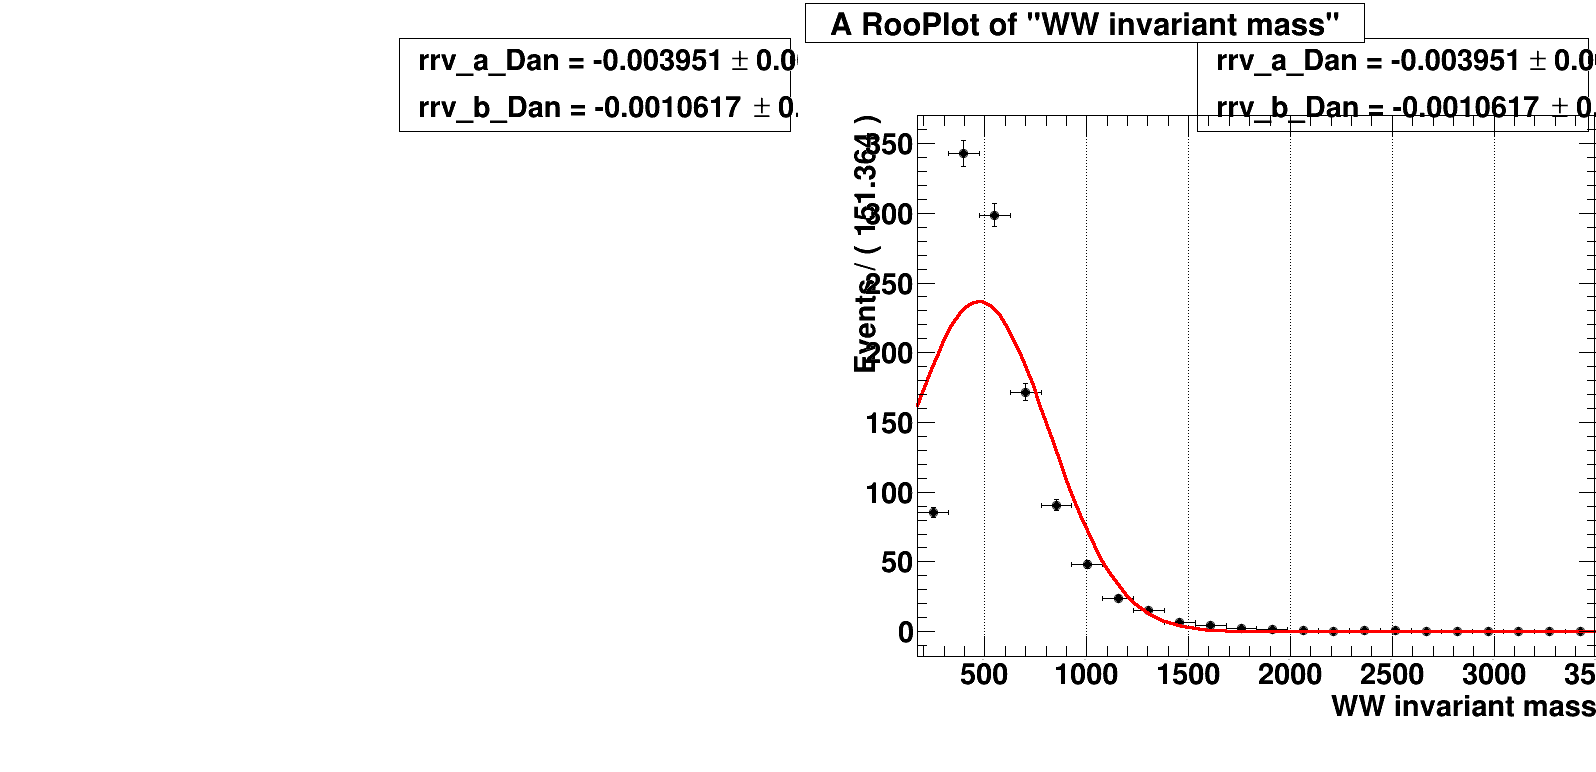

In [8]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## 2. Landau

In [8]:
# Clear the previous canvas
c.Clear()
frame.Delete()
rrv_c_Landau = r.RooRealVar("rrv_c_Landau","rrv_c_Landau",50,20,2500);
rrv_n_Landau = r.RooRealVar("rrv_n_Landau","rrv_n_Landau",10,10,500);

model_landau = r.RooLandau("model_landau","model_landau",rrv_x,rrv_c_Landau,rrv_n_Landau) 

model_landau.fitTo(dh,r.RooFit.Save(1))

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_landau.plotOn(frame, r.RooFit.LineColor(2))

<ROOT.RooPlot object ("frame_rrv_x_90dd060") at 0x90dd060>

 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 rrv_c_Landau   5.00000e+01  1.50000e+01    2.00000e+01  2.50000e+03
     2 rrv_n_Landau   1.00000e+01  4.90000e+01    1.00000e+01  5.00000e+02
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE2 BROUGHT BACK INSIDE LIMITS.
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   15 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 MINUIT WARNING IN MIGrad    
 ============== VARIABLE2 IS AT ITS 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


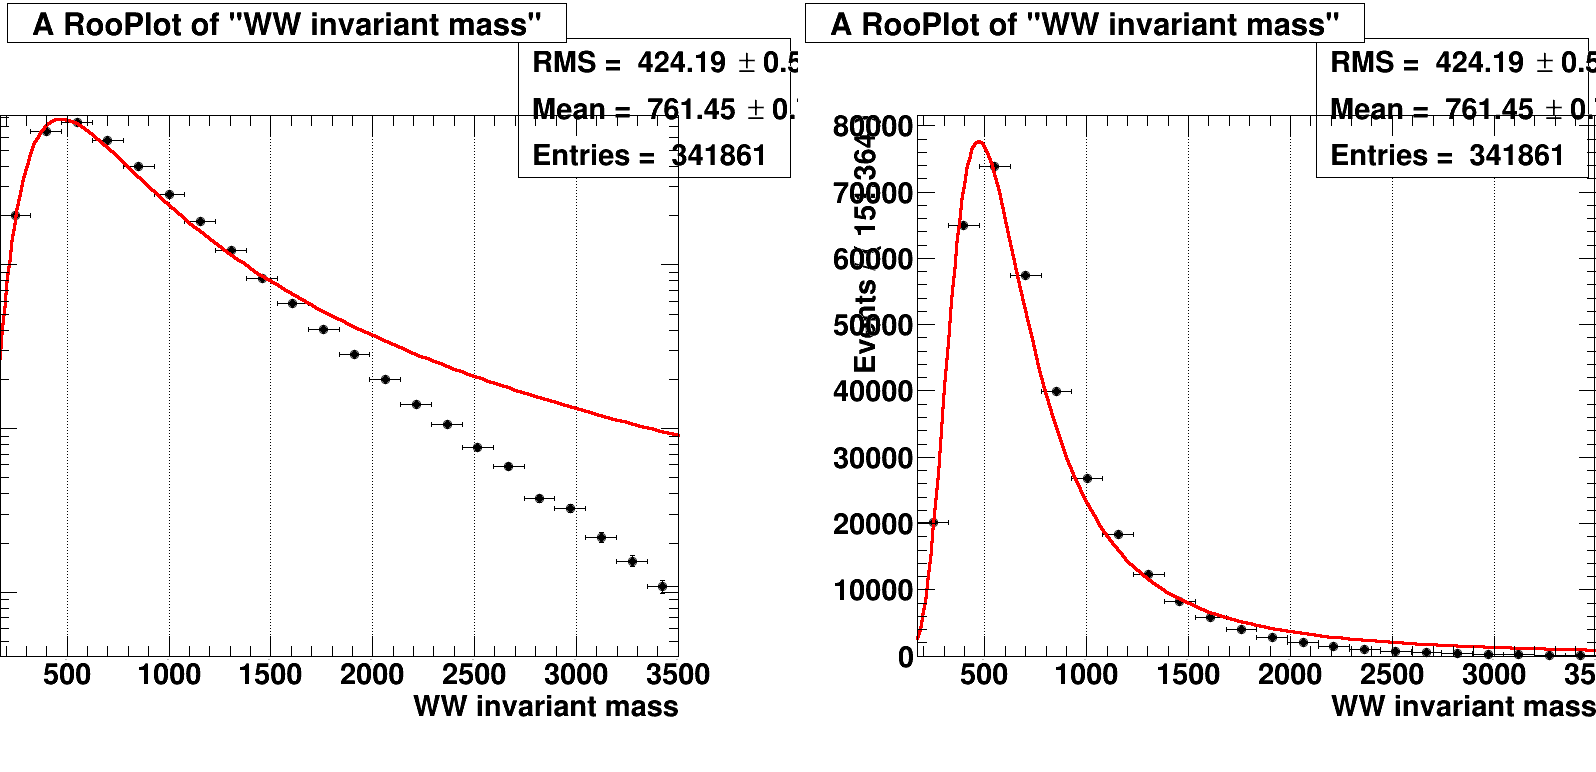

In [9]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## 3. Gaussian

In [10]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_c_Gaus = r.RooRealVar("rrv_c_Gaus","rrv_c_Gaus",583,200, 700);
rrv_n_Gaus = r.RooRealVar("rrv_n_Gaus","rrv_n_Gaus",100,5,400);
model_gaus = r.RooGaussian("model_gaus","model_gaus",rrv_x,rrv_c_Gaus, rrv_n_Gaus);

model_gaus.fitTo(dh)

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_gaus.plotOn(frame, r.RooFit.LineColor(2))

<ROOT.RooPlot object ("frame_rrv_x_9539db0") at 0x9539db0>

 **********
 **   19 **SET PRINT           1
 **********
 **********
 **   20 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 rrv_c_Gaus   5.83000e+02  5.00000e+01    2.00000e+02  7.00000e+02
     2 rrv_n_Gaus   1.00000e+02  3.95000e+01    5.00000e+00  4.00000e+02
 **********
 **   21 **SET ERR         0.5
 **********
 **********
 **   22 **SET PRINT           1
 **********
 **********
 **   23 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   24 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=5.5085e+06 FROM MIGRAD    STATUS=INITIATE       10 CALLS          11 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIRST   
 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


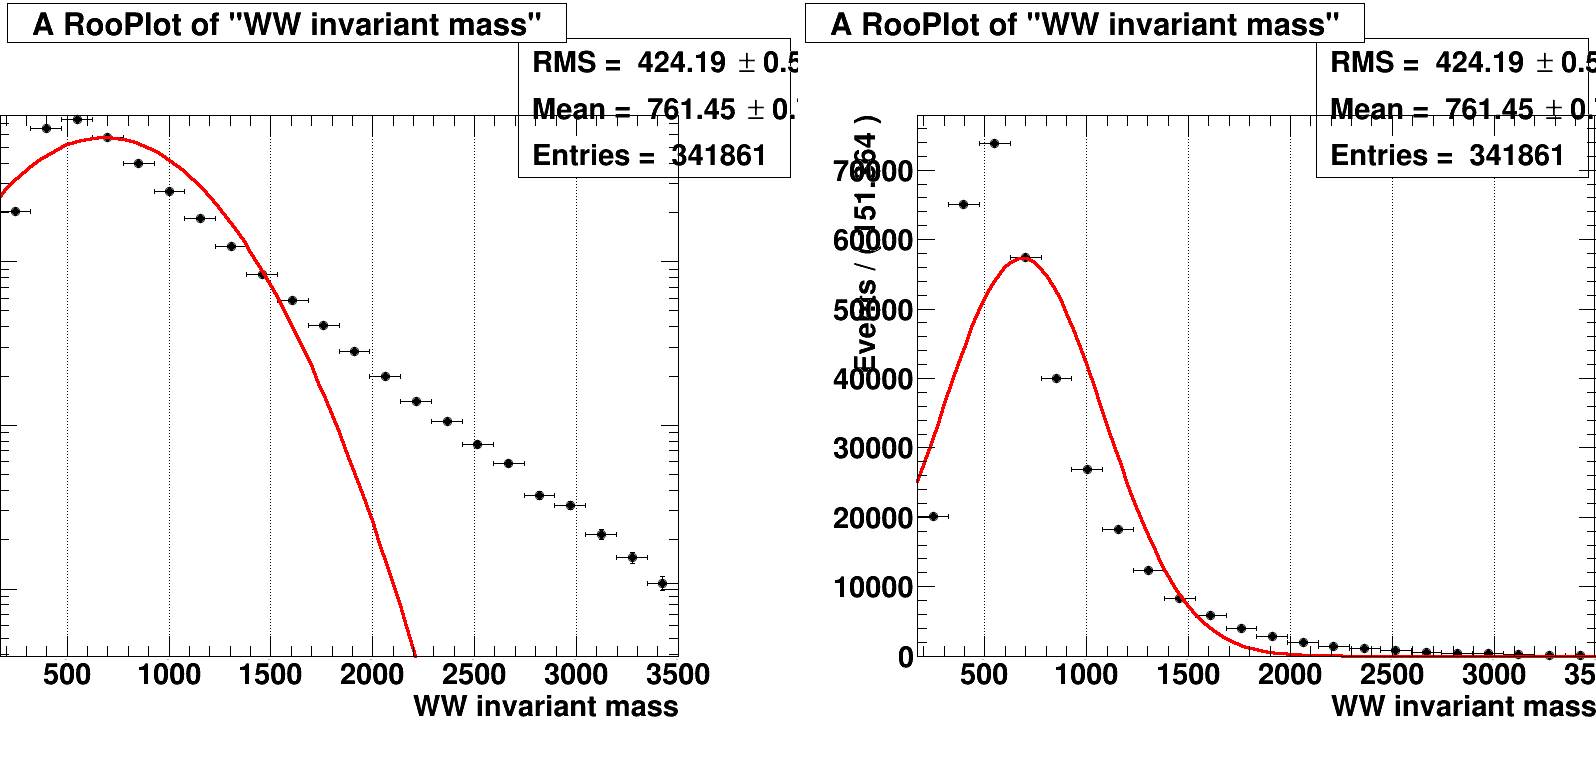

In [11]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

# ErfExp

In [12]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_c_ErfExp = r.RooRealVar("rrv_c_ErfExp","rrv_c_ErfExp",-0.05,-0.1,-1e-4);
rrv_offset_ErfExp = r.RooRealVar("rrv_offset_ErfExp","rrv_offset_ErfExp",60.,30.,120);
rrv_width_ErfExp = r.RooRealVar("rrv_width_ErfExp","rrv_width_ErfExp",30.,10, 60.)
model_ErfExp = r.RooErfExpPdf("model_ErfExp","model_ErfExp",rrv_x,rrv_c_ErfExp, rrv_offset_ErfExp, rrv_width_ErfExp);

model_ErfExp.fitTo(dh,r.RooFit.Save(1))

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_ErfExp.plotOn(frame, r.RooFit.LineColor(2))

<ROOT.RooPlot object ("frame_rrv_x_9578170") at 0x9578170>

 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 rrv_c_ErfExp  -5.00000e-02  9.99000e-03   -1.00000e-01 -1.00000e-04
     2 rrv_offset_ErfExp   6.00000e+01  9.00000e+00    3.00000e+01  1.20000e+02
     3 rrv_width_ErfExp   3.00000e+01  5.00000e+00    1.00000e+01  6.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=1.11114e+07 FROM MIGRAD    STATUS=INITIATE       69 CALLS          70 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERRO

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


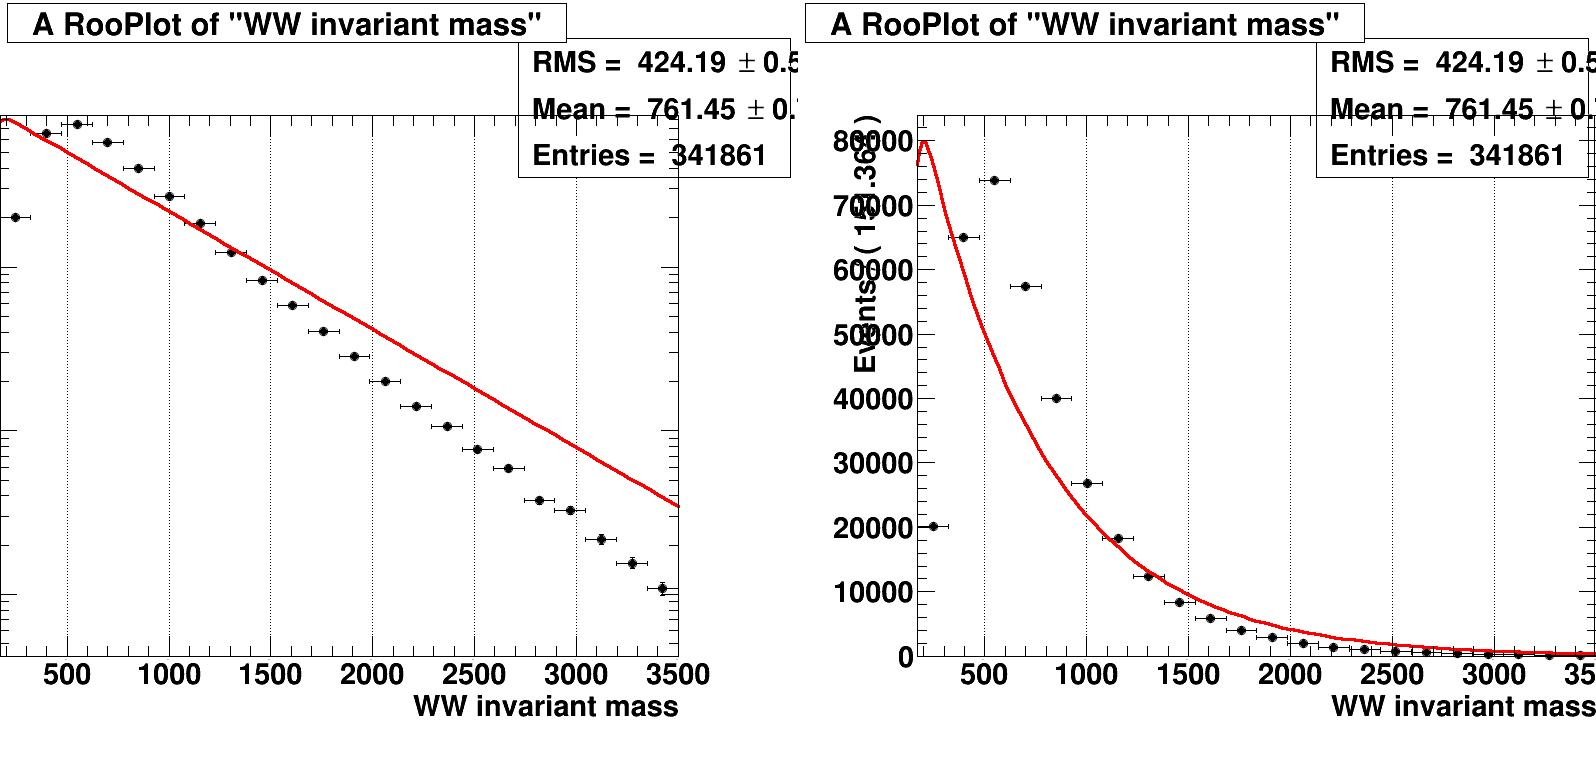

In [13]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## ErfExp V1 (Different initial parameters)

In [14]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_c_ErfExp_v1 = r.RooRealVar("rrv_c_ErfExp_v1","rrv_c_ErfExp_v1",-0.006,-0.1,0.);
rrv_offset_ErfExp_v1 = r.RooRealVar("rrv_offset_ErfExp_v1","rrv_offset_ErfExp_v1",450.,400.,550.);
rrv_width_ErfExp_v1 = r.RooRealVar("rrv_width_ErfExp_v1","rrv_width_ErfExp_v1",70.,10,100.)
model_ErfExp_v1 = r.RooErfExpPdf("model_ErfExp_v1","model_ErfExp_v1",rrv_x,rrv_c_ErfExp_v1, rrv_offset_ErfExp_v1, rrv_width_ErfExp_v1);

model_ErfExp_v1.fitTo(dh,r.RooFit.Save(1))

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_ErfExp_v1.plotOn(frame, r.RooFit.LineColor(2))

<ROOT.RooPlot object ("frame_rrv_x_957f1e0") at 0x957f1e0>

 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 rrv_c_ErfExp_v1  -6.00000e-03  3.00000e-03   -1.00000e-01  0.00000e+00
     2 rrv_offset_ErfExp_v1   4.50000e+02  1.50000e+01    4.00000e+02  5.50000e+02
     3 rrv_width_ErfExp_v1   7.00000e+01  9.00000e+00    1.00000e+01  1.00000e+02
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   15 **MIGRAD        1500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=2.75155e+06 FROM MIGRAD    STATUS=INITIATE       12 CALLS          13 TOTAL
                     EDM= unknown      STRATEGY= 1    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


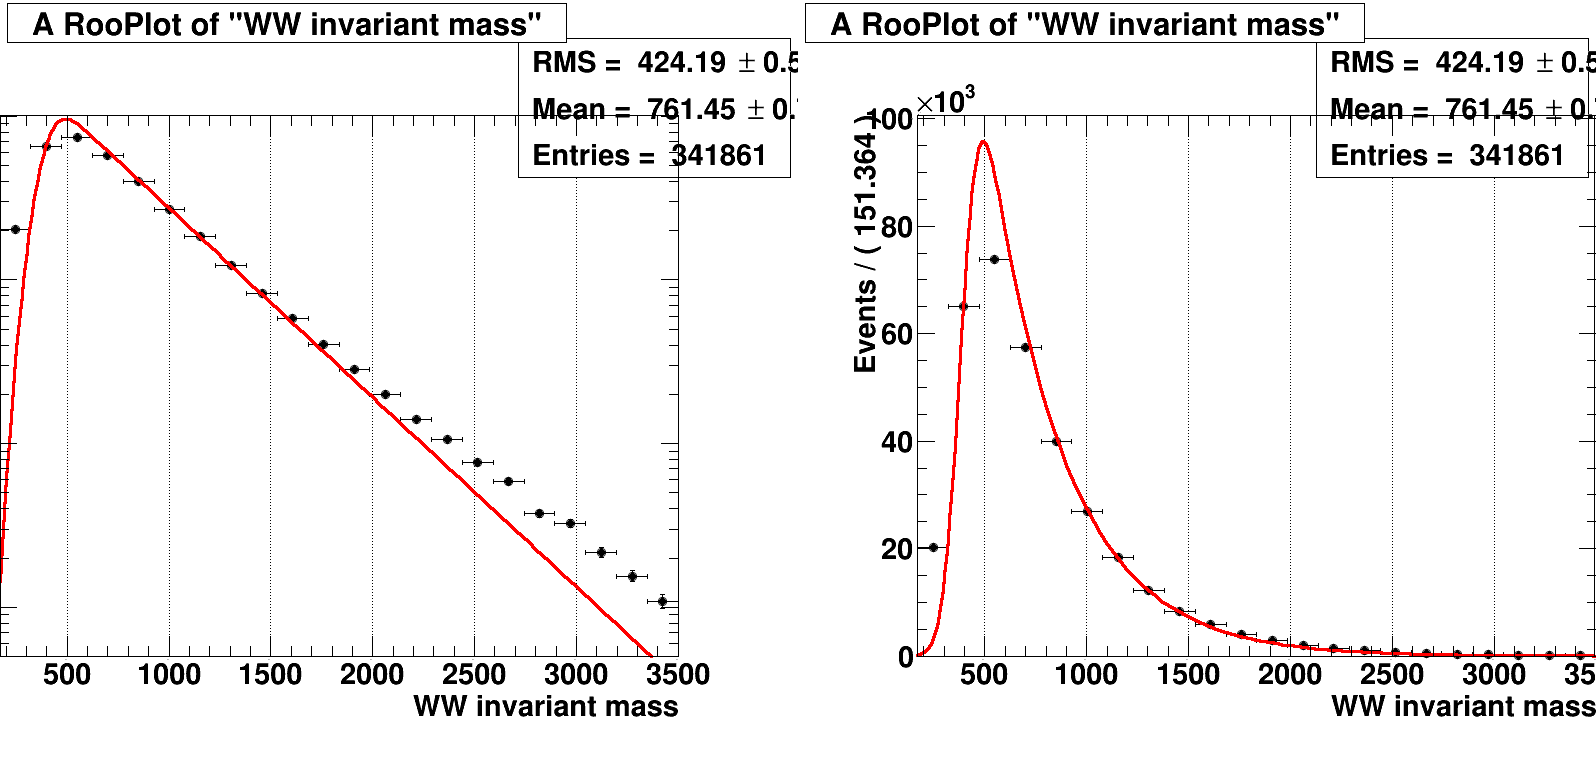

In [15]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## ErfExp v2

In [16]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_c_ErfExp = r.RooRealVar("rrv_c_ErfExp","rrv_c_ErfExp",-0.006,-0.1,0.);
rrv_offset_ErfExp = r.RooRealVar("rrv_offset_ErfExp","rrv_offset_ErfExp",450.,400.,550.);
rrv_width_ErfExp = r.RooRealVar("rrv_width_ErfExp","rrv_width_ErfExp",70.,10,100.)
rrv_residue_ErfExp = r.RooRealVar("rrv_residue_ErfExp","rrv_residue_ErfExp",0.,0.,1.)
#model_ErfExp_v2 = r.RooErfExpPdf("model_ErfExp_v2","model_ErfExp_v2",rrv_x,rrv_c_ErfExp_v2, rrv_offset_ErfExp_v2, rrv_width_ErfExp_v2);

model_ErfExp_v2 = r.RooGenericPdf("model_ErfExp_v2","model_ErfExp_v2","(TMath::Exp(%s*%s) + %s)*(1.+TMath::Erf((%s-%s)/%s))/2. "%(rrv_c_ErfExp.GetName(),rrv_x.GetName(), rrv_residue_ErfExp.GetName(), rrv_x.GetName(),rrv_offset_ErfExp.GetName(), rrv_width_ErfExp.GetName()), r.RooArgList(rrv_x,rrv_c_ErfExp,rrv_offset_ErfExp,rrv_width_ErfExp,rrv_residue_ErfExp))

model_ErfExp_v2.fitTo(dh,r.RooFit.Save(1))

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_ErfExp_v2.plotOn(frame, r.RooFit.LineColor(2))

<ROOT.RooPlot object ("frame_rrv_x_95a0310") at 0x95a0310>

 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 rrv_c_ErfExp  -6.00000e-03  3.00000e-03   -1.00000e-01  0.00000e+00
     2 rrv_offset_ErfExp   4.50000e+02  1.50000e+01    4.00000e+02  5.50000e+02
     3 rrv_residue_ErfExp   0.00000e+00  1.00000e-01    0.00000e+00  1.00000e+00
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE3 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE3 BROUGHT BACK INSIDE LIMITS.
     4 rrv_width_ErfExp   7.00000e+01  9.00000e+00    1.00000e+01  1.00000e+02
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


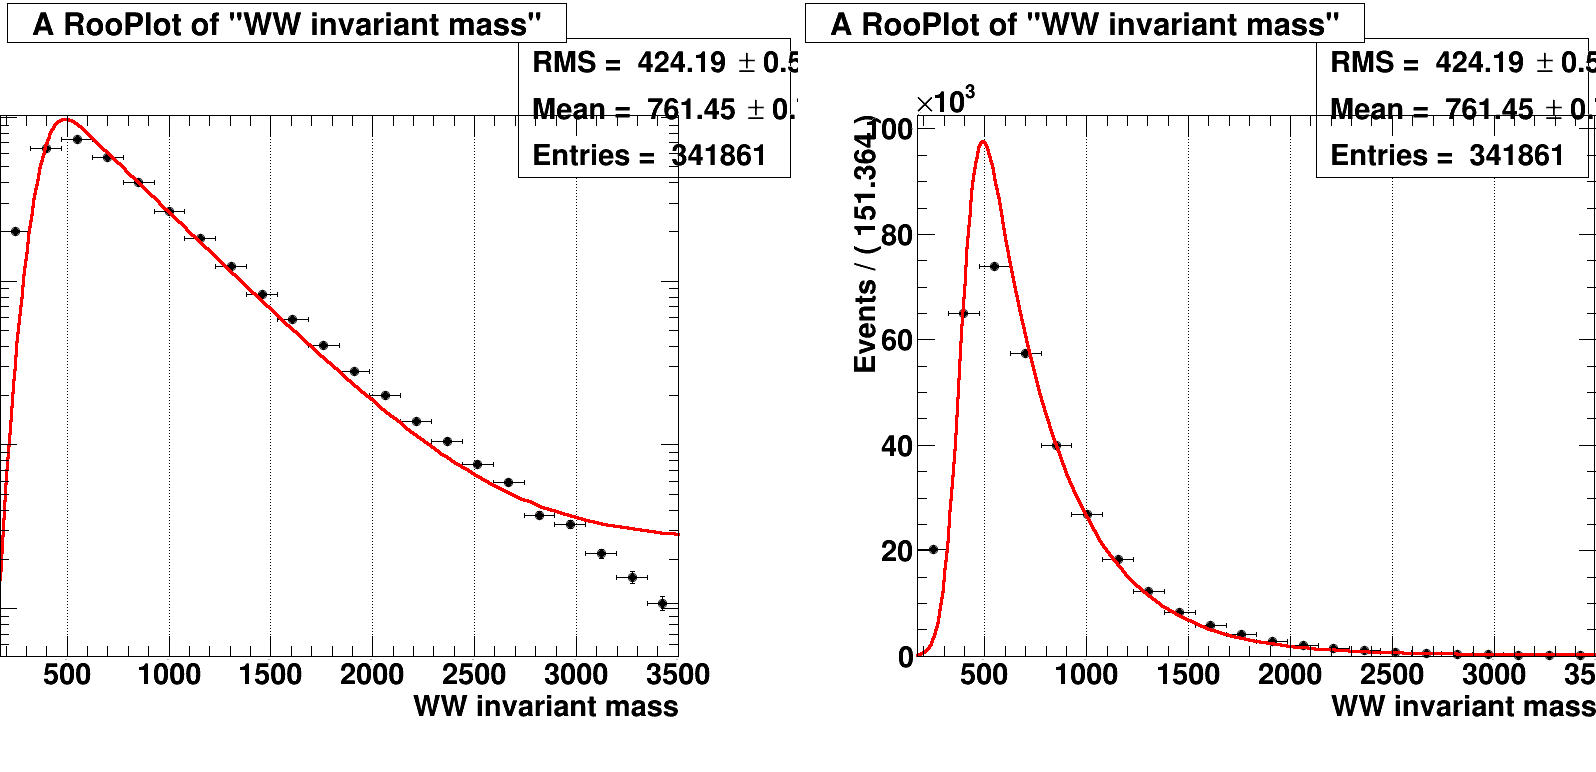

In [17]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## ErfExp V3

In [18]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_c_ErfExp       = r.RooRealVar("rrv_c_ErfExp","rrv_c_ErfExp",-0.005,-0.1,0.);
rrv_offset_ErfExp  = r.RooRealVar("rrv_offset_ErfExp","rrv_offset_ErfExp",450.,400,500.);
rrv_width_ErfExp   = r.RooRealVar("rrv_width_ErfExp","rrv_width_ErfExp", 50.,10,100.);
rrv_residue_ErfExp = r.RooRealVar("rrv_residue_ErfExp","rrv_residue_ErfExp",0.,0.,1.);
rrv_high_ErfExp    = r.RooRealVar("rrv_high_ErfExp","rrv_high_ErfExp",1.,0.,400);
rrv_high_ErfExp.setConstant(1);
model_ErfExp_v3 = r.RooGenericPdf("model_ErfExp_v3","model_ErfExp_v3", "(TMath::Exp(%s*%s) + %s)* TMath::Power( ((1+TMath::Erf((%s-%s)/%s))/2.), %s )"%(rrv_c_ErfExp.GetName(),rrv_x.GetName(), rrv_residue_ErfExp.GetName(),rrv_x.GetName(),rrv_offset_ErfExp.GetName(), rrv_width_ErfExp.GetName(), rrv_high_ErfExp.GetName()), r.RooArgList(rrv_x,rrv_c_ErfExp,rrv_offset_ErfExp,rrv_high_ErfExp,rrv_width_ErfExp,rrv_residue_ErfExp) )

model_ErfExp_v3.fitTo(dh,r.RooFit.Save(1))

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_ErfExp_v3.plotOn(frame, r.RooFit.LineColor(2))

<ROOT.RooPlot object ("frame_rrv_x_8b61e70") at 0x8b61e70>

 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 rrv_c_ErfExp  -5.00000e-03  2.50000e-03   -1.00000e-01  0.00000e+00
     2 rrv_offset_ErfExp   4.50000e+02  1.00000e+01    4.00000e+02  5.00000e+02
     3 rrv_residue_ErfExp   0.00000e+00  1.00000e-01    0.00000e+00  1.00000e+00
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE3 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE3 BROUGHT BACK INSIDE LIMITS.
     4 rrv_width_ErfExp   5.00000e+01  9.00000e+00    1.00000e+01  1.00000e+02
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   15 **MIGRAD 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


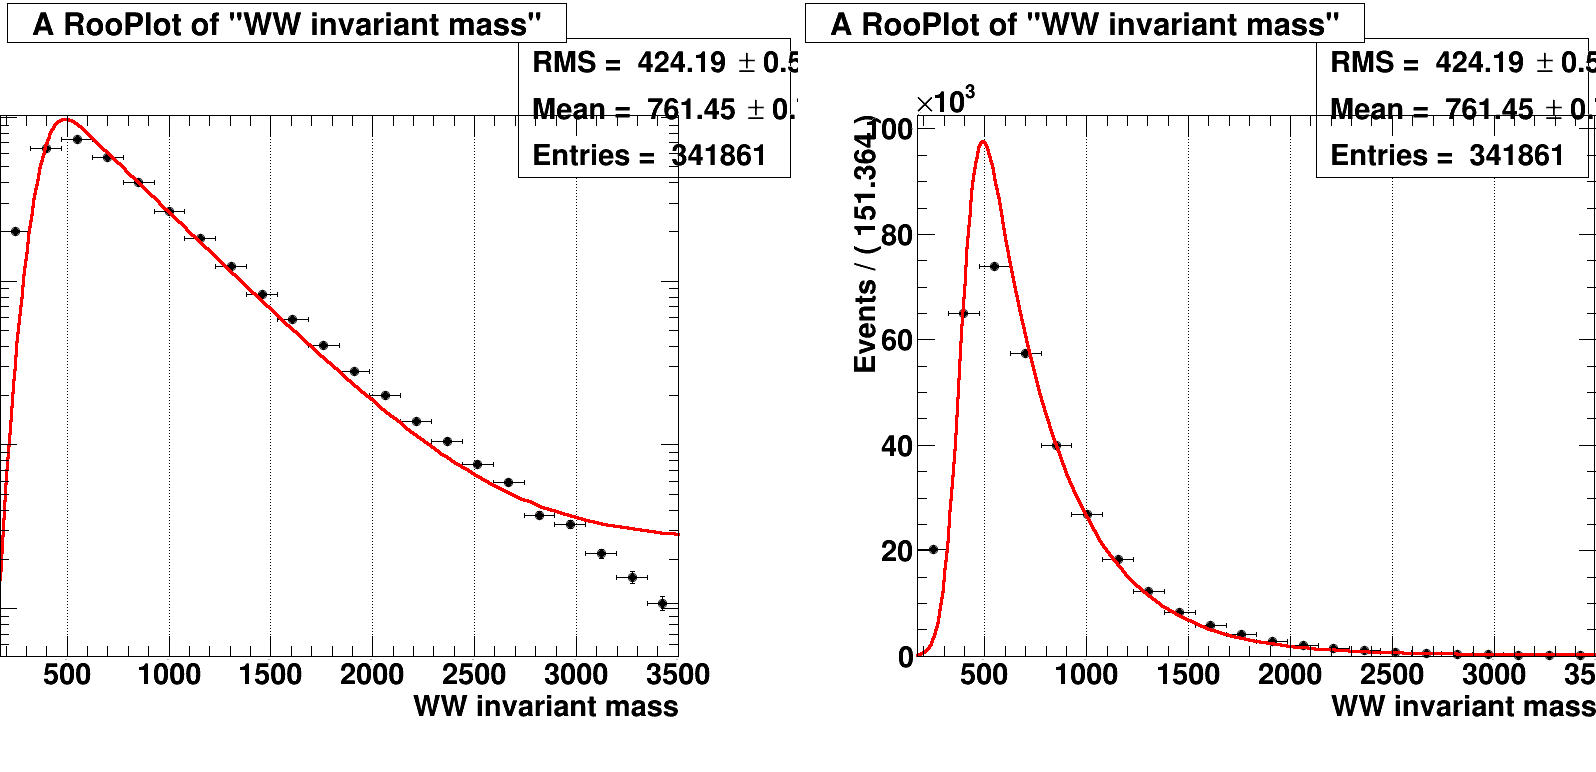

In [19]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## User 1

In [20]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_p0 = r.RooRealVar("rrv_p0_User1","rrv_p0_User1", 30, 10, 90);
rrv_p1 = r.RooRealVar("rrv_p1_User1","rrv_p1_User1", -2, -4, 0);
model_User1=r.RooUser1Pdf("model_User1","model_User1",rrv_x,rrv_p0,rrv_p1);

model_User1.fitTo(dh,r.RooFit.Save(1))

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_User1.plotOn(frame, r.RooFit.LineColor(2))

<ROOT.RooPlot object ("frame_rrv_x_91c12c0") at 0x91c12c0>

 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 rrv_p0_User1   3.00000e+01  8.00000e+00    1.00000e+01  9.00000e+01
     2 rrv_p1_User1  -2.00000e+00  4.00000e-01   -4.00000e+00  0.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=3.06168e+07 FROM MIGRAD    STATUS=INITIATE        8 CALLS           9 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIRST

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


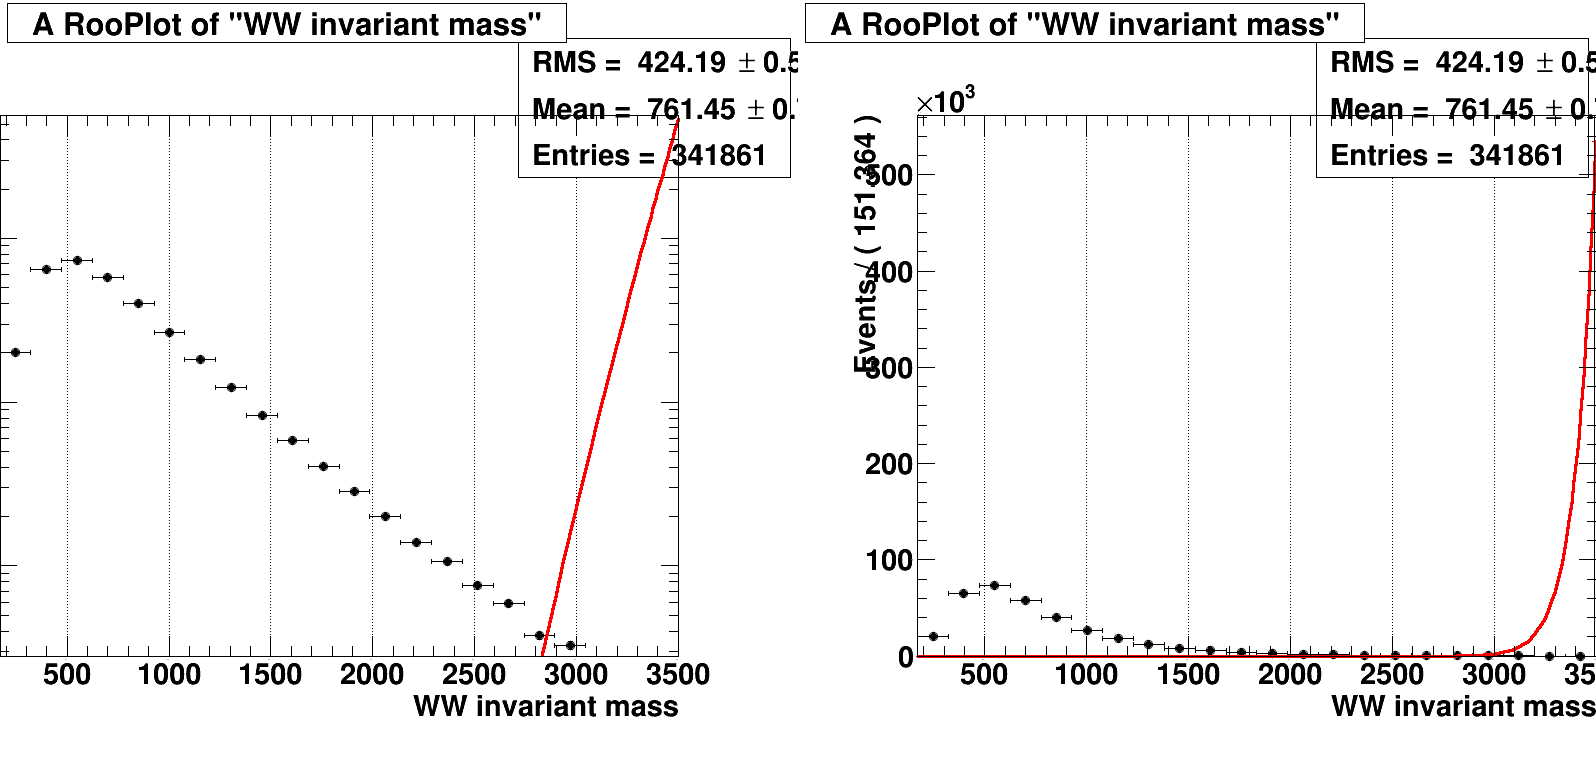

In [21]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## ExpGauss

In [22]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_c_Exp       = r.RooRealVar("rrv_c_Exp","rrv_c_Exp",0.05,-0.2,0.2);
exp             = r.RooExponential("exp","exp",rrv_x,rrv_c_Exp);

rrv_mean1_gaus  = r.RooRealVar("rrv_mean1_gaus","rrv_mean1_gaus",583,200, 700);
rrv_sigma1_gaus = r.RooRealVar("rrv_smgma1_gaus","rrv_sigma1_gaus",100,5,400);
rrv_high        = r.RooRealVar("rrv_high","rrv_high",0.5,0.,1.);
gaus            = r.RooGaussian("gaus","gaus", rrv_x,rrv_mean1_gaus,rrv_sigma1_gaus);

model_ExpGaus       = r.RooAddPdf("model_ExpGaus","model_ExpGaus",r.RooArgList(exp,gaus),r.RooArgList(rrv_high))

model_ExpGaus.fitTo(dh,r.RooFit.Save(1))

frame = rrv_x.frame() 
dh.plotOn(frame)
dh.statOn(frame); 

model_ExpGaus.plotOn(frame, r.RooFit.LineColor(2))

<ROOT.RooPlot object ("frame_rrv_x_96bfec0") at 0x96bfec0>

 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 rrv_c_Exp    5.00000e-02  4.00000e-02   -2.00000e-01  2.00000e-01
     2 rrv_high     5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     3 rrv_mean1_gaus   5.83000e+02  5.00000e+01    2.00000e+02  7.00000e+02
     4 rrv_smgma1_gaus   1.00000e+02  3.95000e+01    5.00000e+00  4.00000e+02
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        2000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=2.60702e+06 FROM MIGRAD    STATUS=INITIATE       45 CALLS          46 TO

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


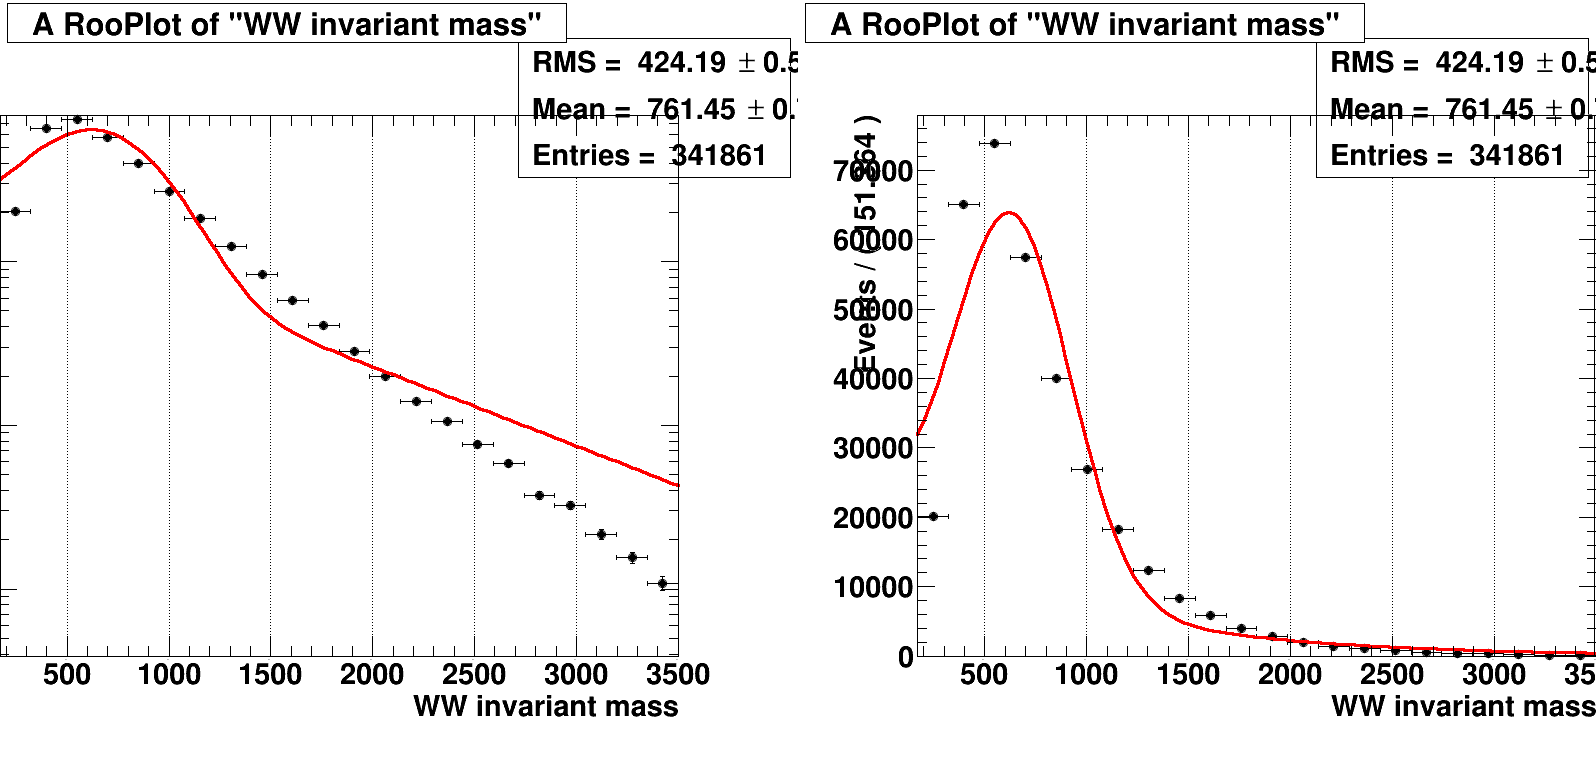

In [23]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

In [24]:
# Clear the previous canvas
c.Clear()
frame.Delete()

rrv_a_ExpN = r.RooRealVar("rrv_a_ExpN","rrv_a_ExpN",-4.4e-3,-1e-3,-7e-3);
rrv_b_ExpN = r.RooRealVar("rrv_b_ExpN","rrv_b_ExpN",-765,571.0,959.0);
model_ExpN = r.RooExpNPdf("model_ExpN","model_ExpN",rrv_x,rrv_a_Dan,rrv_b_Dan);

model_ExpN.fitTo(dh,r.RooFit.Save(1))
model_ExpN.fitTo(dh,r.RooFit.Save(1))


frame = rrv_x.frame() 
dh.plotOn(frame)
#dh.statOn(frame); 

model_ExpN.plotOn(frame, r.RooFit.LineColor(2))
model_ExpN.paramOn(frame)

<ROOT.RooPlot object ("frame_rrv_x_97043b0") at 0x97043b0>

 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 rrv_a_Dan   -8.89164e-04  1.40431e-05   -1.02832e-02 -2.83200e-06
     2 rrv_b_Dan   -1.36132e-03  1.40364e-05   -1.02832e-02 -2.83200e-04
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=2.56326e+06 FROM MIGRAD    STATUS=INITIATE        8 CALLS           9 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIRST   


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


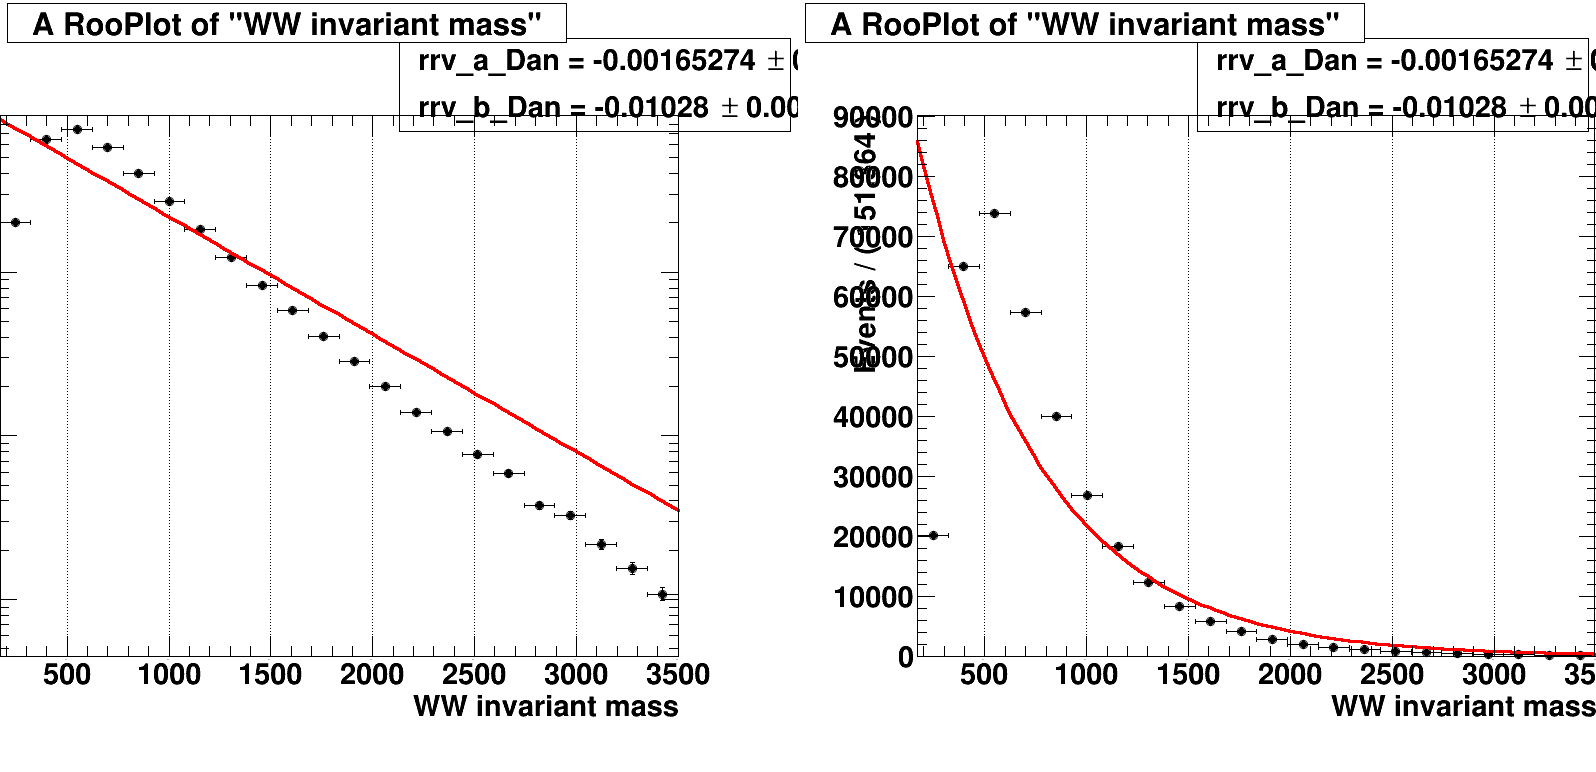

In [25]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## Gaus * ExpN

In [26]:
# Clear the previous canvas
#c.Clear()
#frame.Delete()

frac = r.RooRealVar("frac","frac",0.5,0.,0.1);

#model_GausExpN = r.RooProdPdf("model_GausExpN","model_GausExpN",model_gaus,model_ExpN)
model_GausExpN = r.RooAddPdf("model_GausExpN","model_GausExpN",r.RooArgList(model_gaus,model_ExpN),r.RooArgList(frac),1)


model_GausExpN.fitTo(dh,r.RooFit.Save(1))
model_GausExpN.fitTo(dh,r.RooFit.Save(1))


frame = rrv_x.frame() 
dh.plotOn(frame)
#dh.statOn(frame); 

model_GausExpN.plotOn(frame, r.RooFit.LineColor(2))
model_GausExpN.paramOn(frame)

<ROOT.RooPlot object ("frame_rrv_x_9755c10") at 0x9755c10>

 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 frac         5.00000e-02  constant
     2 rrv_a_Dan   -1.65274e-03  3.02073e-06   -1.02832e-02 -2.83200e-06
     3 rrv_b_Dan   -1.02832e-02  6.58246e-03   -1.02832e-02 -2.83200e-04
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE3 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE3 BROUGHT BACK INSIDE LIMITS.
     4 rrv_c_Gaus   6.83787e+02  8.10290e-01    2.00000e+02  7.00000e+02
     5 rrv_n_Gaus   4.00000e+02  1.42097e-03    5.00000e+00  4.00000e+02
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE5 IS AT ITS UPPER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE5 BROUGHT BACK INSIDE LIMITS.
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR       

Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


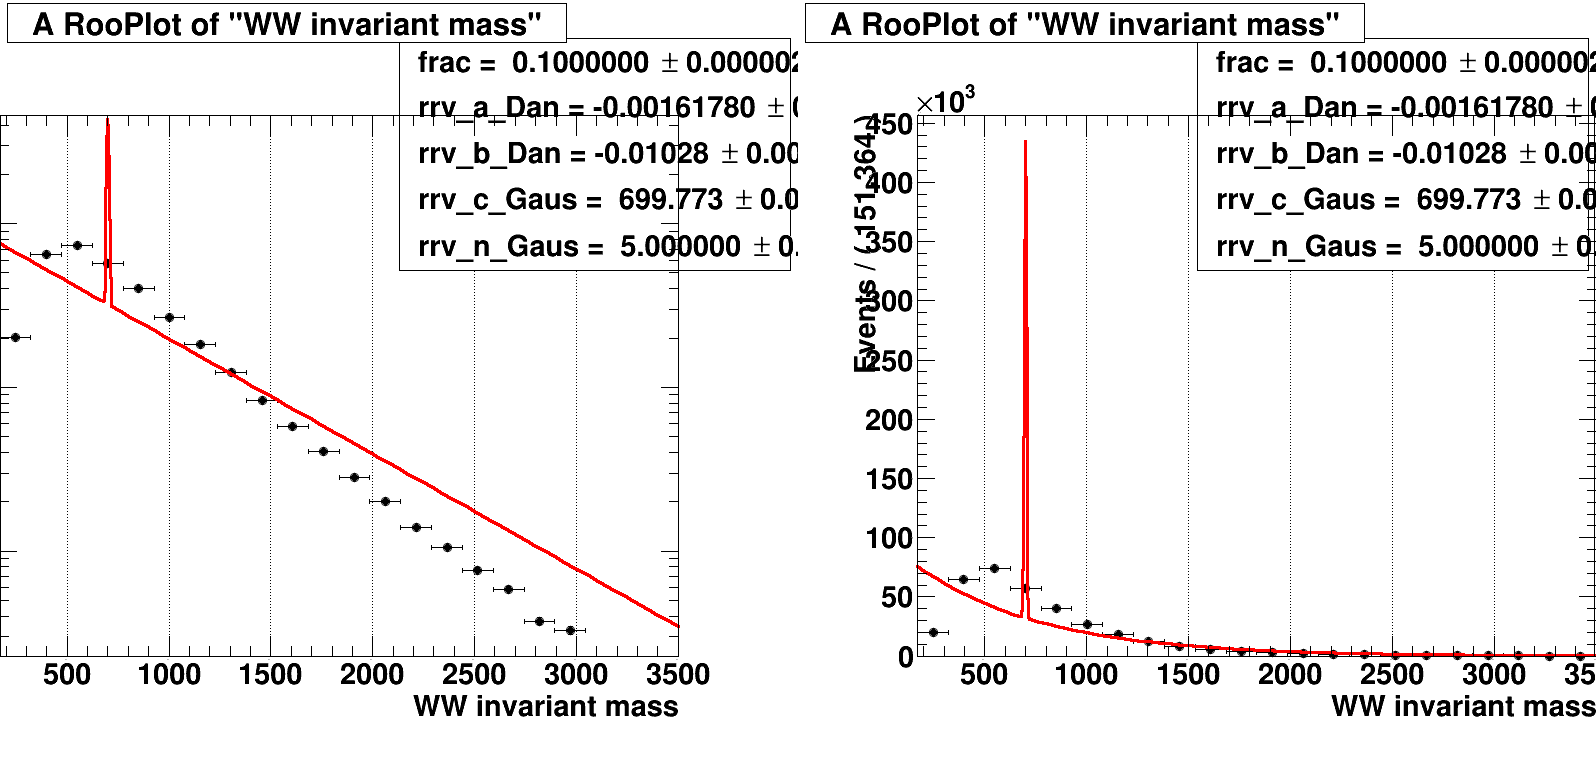

In [27]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()

## Dan+Gaus

In [28]:
# Clear the previous canvas
c.Clear()
frame.Delete()

frac = r.RooRealVar("frac","frac",0.5,0.,0.1);

model_DanGaus = r.RooAddPdf("model_DanGaus","model_DanGaus",r.RooArgList(model_Dan,model_gaus),r.RooArgList(frac),1)


model_DanGaus.fitTo(dh,r.RooFit.Save(1))
model_DanGaus.fitTo(dh,r.RooFit.Save(1))


frame = rrv_x.frame() 
dh.plotOn(frame)
#dh.statOn(frame); 

model_DanGaus.plotOn(frame, r.RooFit.LineColor(2))
model_DanGaus.paramOn(frame)

<ROOT.RooPlot object ("frame_rrv_x_96b5150") at 0x96b5150>

 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 frac         5.00000e-02  constant
     2 rrv_a_Dan   -1.61780e-03  3.23629e-06   -1.02832e-02 -2.83200e-06
     3 rrv_b_Dan   -1.02832e-02  7.14064e-03   -1.02832e-02 -2.83200e-04
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE3 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE3 BROUGHT BACK INSIDE LIMITS.
     4 rrv_c_Gaus   6.99773e+02  2.16829e-02    2.00000e+02  7.00000e+02
     5 rrv_n_Gaus   5.00000e+00  4.69533e-05    5.00000e+00  4.00000e+02
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE5 IS AT ITS LOWER ALLOWED LIMIT.
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY

Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Error in <ROOT::Math::FitResult>: FitConfiguration and Minimizer result are not consistent


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


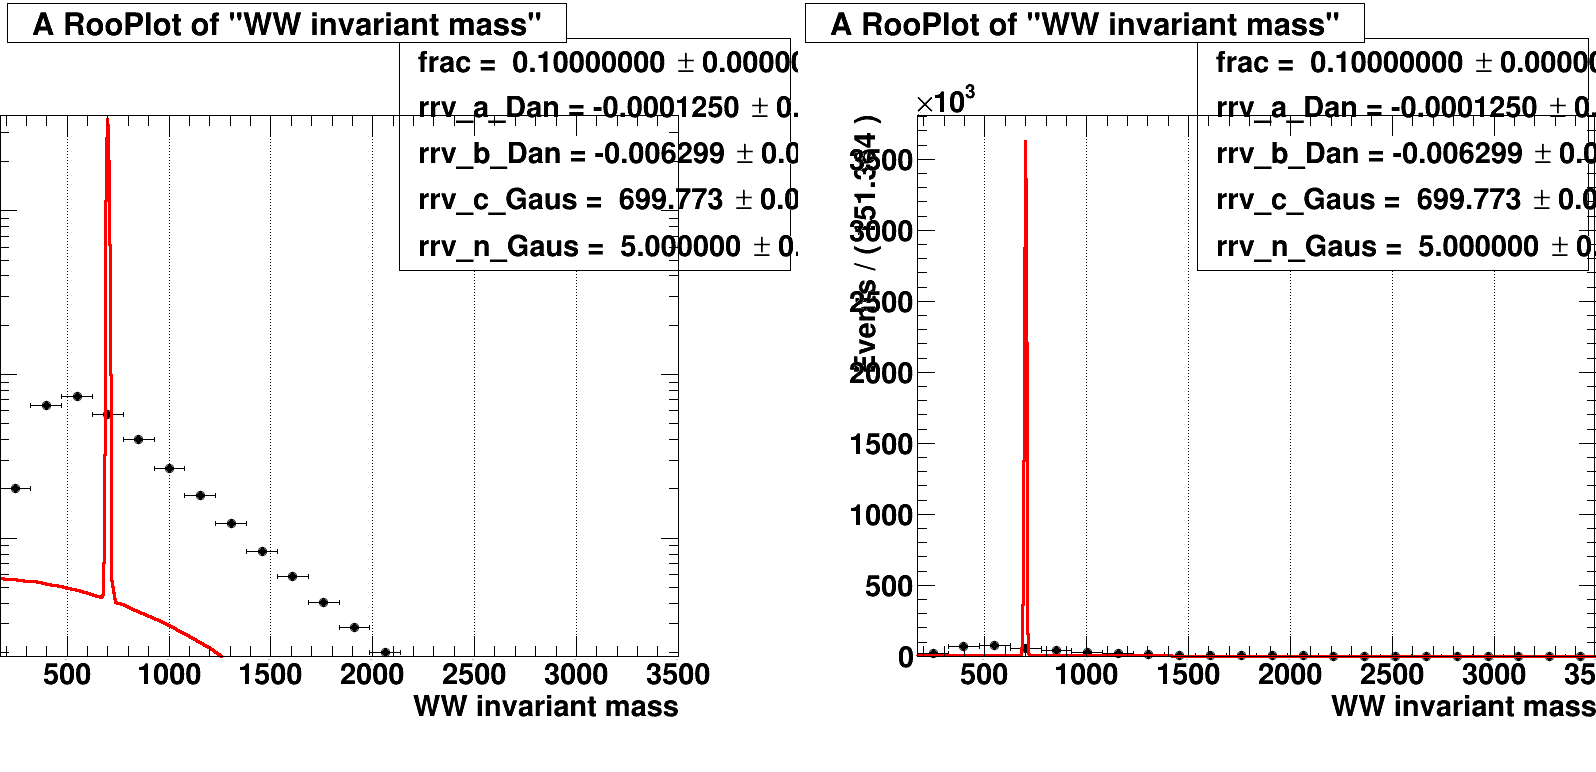

In [29]:
c,pad1,pad2 = createCanvasPads()
pad1.cd()
frame.Draw()
pad2.cd()
frame.Draw()
c.Draw()